# Classification Prediction with Imbalanced Target

## Mary Donovan Martello

# Part 7:  Neural Network Models

In [2]:
# import libraries

import pandas as pd
from pandas import read_csv
import numpy as np
from numpy import mean
from numpy import std
from numpy import argmax

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import models
from keras import layers


#stop unnecessary warnings from printing to the screen
import warnings
warnings.simplefilter('ignore')



In [3]:
df = pd.read_csv('pcaDefault.csv')

In [102]:
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,SEX,EDUCATION,MARRIAGE,default
0,-0.957833,0.937311,1.089232,-3.070175,-1.616449,-0.714438,1.412181,0.851787,1,1,2,1
1,0.140456,0.781096,1.595321,0.000953,-0.933724,-2.166769,0.354654,1.852528,1,2,2,1
2,0.975396,0.018375,-0.006510,0.065376,-0.051777,-0.004641,0.500938,1.655141,1,1,1,1
3,-0.147522,1.543874,-1.033714,-1.732933,2.264226,0.395811,1.405861,0.736916,2,2,2,0
4,-0.029195,-0.055276,0.443091,3.284571,-0.871001,2.759460,0.446885,2.491130,1,2,1,0


**Create a Features Dataframe without Categorical Features**

In [4]:

# create a whole features dataset that can be used for train and validation data splitting
# drop the categorical features
dfNum = df.drop(['SEX', 'EDUCATION', 'MARRIAGE', 'default'], axis = 1)


   SEX  EDUCATION  MARRIAGE
0    1          1         2
1    1          2         2
2    1          1         1
3    2          2         2


In [104]:
dfNum.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.957833,0.937311,1.089232,-3.070175,-1.616449,-0.714438,1.412181,0.851787
1,0.140456,0.781096,1.595321,0.000953,-0.933724,-2.166769,0.354654,1.852528
2,0.975396,0.018375,-0.006510,0.065376,-0.051777,-0.004641,0.500938,1.655141
3,-0.147522,1.543874,-1.033714,-1.732933,2.264226,0.395811,1.405861,0.736916
4,-0.029195,-0.055276,0.443091,3.284571,-0.871001,2.759460,0.446885,2.491130


In [5]:
# create a whole target dataset that can be used for train and validation data splitting
y =  df['default']

In [297]:
print(dfNum.shape)
print(dfNum.columns)
dfNum.head()

(30000, 8)
Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'], dtype='object')


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.957833,0.937311,1.089232,-3.070175,-1.616449,-0.714438,1.412181,0.851787
1,0.140456,0.781096,1.595321,0.000953,-0.933724,-2.166769,0.354654,1.852528
2,0.975396,0.018375,-0.006510,0.065376,-0.051777,-0.004641,0.500938,1.655141
3,-0.147522,1.543874,-1.033714,-1.732933,2.264226,0.395811,1.405861,0.736916
4,-0.029195,-0.055276,0.443091,3.284571,-0.871001,2.759460,0.446885,2.491130


In [105]:
# separate data into training and validation 
XNTrain, XNTest, yNTrain, yNTest = train_test_split(dfNum, y, stratify=y, test_size =0.3, random_state=11)

In [106]:
print(XNTrain.shape)
print(XNTrain.columns)

(21000, 8)
Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'], dtype='object')


In [217]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units =15 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))

# Adding the second hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))

# Adding dropout layer to fight overfitting
classifier.add(Dropout(0.5))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', 'Recall'])

# Fitting the ANN to the Training set
results = classifier.fit(XNTrain, yNTrain, batch_size = 32, epochs = 100)

Epoch 1/100
657/657 [==============================] - 1s 2ms/step - loss: 0.5146 - accuracy: 0.7783 - recall: 0.0013
Epoch 2/100
657/657 [==============================] - 1s 1ms/step - loss: 0.4819 - accuracy: 0.7788 - recall: 0.0000e+00
Epoch 3/100
657/657 [==============================] - 1s 1ms/step - loss: 0.4833 - accuracy: 0.7788 - recall: 0.0000e+00
Epoch 4/100
657/657 [==============================] - 1s 1ms/step - loss: 0.4812 - accuracy: 0.7788 - recall: 0.0000e+00
Epoch 5/100
657/657 [==============================] - 1s 1ms/step - loss: 0.4799 - accuracy: 0.7788 - recall: 0.0000e+00
Epoch 6/100
657/657 [==============================] - 1s 1ms/step - loss: 0.4795 - accuracy: 0.7788 - recall: 0.0000e+00
Epoch 7/100
657/657 [==============================] - 1s 1ms/step - loss: 0.4800 - accuracy: 0.7788 - recall: 0.0000e+00
Epoch 8/100
657/657 [==============================] - 1s 1ms/step - loss: 0.4812 - accuracy: 0.7788 - recall: 0.0000e+00
Epoch 9/100
657/657 [=======

**Imbalance target requires weighting the target classes**

In [129]:
# set variables for weighting the target classes
pos = 6636
neg = 23364
total = 30000

In [130]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.64
Weight for class 1: 2.26


**Set apart validation data**

In [ ]:
x_val = XNTrain[:10000]
partial_x_train = XNTrain[10000:]

y_val = yNTrain[:10000]
partial_y_train = yNTrain[10000:]

**Fit the first model with the class weights and employ validation data**

In [219]:
results1c =classifier.fit(partial_x_train,
                    partial_y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(x_val, y_val),
                       class_weight=class_weight)

Epoch 1/100
344/344 [==============================] - 1s 4ms/step - loss: 0.6255 - accuracy: 0.7793 - recall: 0.3929 - val_loss: 0.5135 - val_accuracy: 0.7875 - val_recall: 0.4844
Epoch 2/100
344/344 [==============================] - 1s 2ms/step - loss: 0.6071 - accuracy: 0.7767 - recall: 0.3879 - val_loss: 0.5273 - val_accuracy: 0.7889 - val_recall: 0.4898
Epoch 3/100
344/344 [==============================] - 1s 2ms/step - loss: 0.6041 - accuracy: 0.7818 - recall: 0.3859 - val_loss: 0.5500 - val_accuracy: 0.7873 - val_recall: 0.4871
Epoch 4/100
344/344 [==============================] - 1s 2ms/step - loss: 0.6014 - accuracy: 0.7605 - recall: 0.5456 - val_loss: 0.5489 - val_accuracy: 0.7560 - val_recall: 0.5808
Epoch 5/100
344/344 [==============================] - 1s 3ms/step - loss: 0.5957 - accuracy: 0.7307 - recall: 0.6412 - val_loss: 0.5742 - val_accuracy: 0.7313 - val_recall: 0.6374
Epoch 6/100
344/344 [==============================] - 1s 2ms/step - loss: 0.5944 - accuracy: 0

344/344 [==============================] - 1s 2ms/step - loss: 0.5892 - accuracy: 0.7008 - recall: 0.6958 - val_loss: 0.5945 - val_accuracy: 0.6956 - val_recall: 0.6818
Epoch 47/100
344/344 [==============================] - 1s 2ms/step - loss: 0.5864 - accuracy: 0.6934 - recall: 0.7069 - val_loss: 0.5483 - val_accuracy: 0.7384 - val_recall: 0.6179
Epoch 48/100
344/344 [==============================] - 1s 2ms/step - loss: 0.5874 - accuracy: 0.7001 - recall: 0.6970 - val_loss: 0.5697 - val_accuracy: 0.7327 - val_recall: 0.6338
Epoch 49/100
344/344 [==============================] - 1s 2ms/step - loss: 0.5888 - accuracy: 0.6996 - recall: 0.6946 - val_loss: 0.5557 - val_accuracy: 0.7293 - val_recall: 0.6197
Epoch 50/100
344/344 [==============================] - 1s 2ms/step - loss: 0.5882 - accuracy: 0.6959 - recall: 0.7094 - val_loss: 0.5519 - val_accuracy: 0.7390 - val_recall: 0.6206
Epoch 51/100
344/344 [==============================] - 1s 2ms/step - loss: 0.5879 - accuracy: 0.6949 -

In [220]:
# check the fitted metrics dictionary 
results_history_dict = results1c.history
results_history_dict.keys()

dict_keys(['loss', 'accuracy', 'recall', 'val_loss', 'val_accuracy', 'val_recall'])

Plot the training and validation loss side by side, as well as the training and validation accuracy.  Determine the optimal epochs to avoid overfitting.

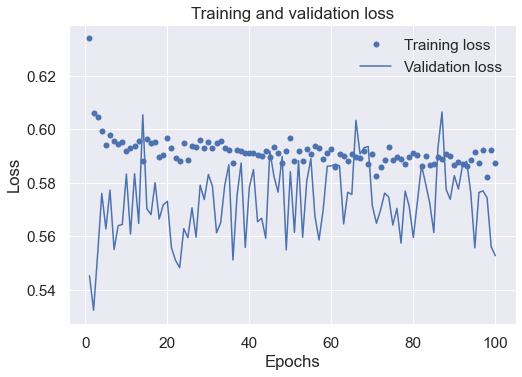

In [136]:
#### import matplotlib.pyplot as plt

accRes = results.history['accuracy']
val_accRes = results.history['val_accuracy']
lossRes = results.history['loss']
val_lossRes = results.history['val_loss']

epochs = range(1, len(accRes) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, lossRes, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_lossRes, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

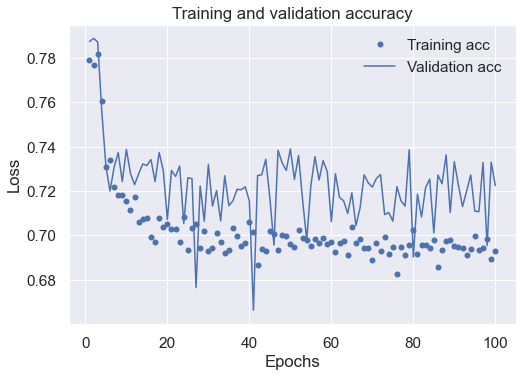

In [240]:
plt.clf()   # clear figure


plt.plot(epochs, accRes, 'bo', label='Training acc')
plt.plot(epochs, val_accRes, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Fit the first model again with optimal epochs and with the class weights and employ validation data**

In [222]:
results2c =classifier.fit(partial_x_train,
                    partial_y_train,
                    epochs=22,
                    batch_size=32,
                    validation_data=(x_val, y_val),
                         class_weight=class_weight)


Epoch 1/22
344/344 [==============================] - 1s 3ms/step - loss: 0.5881 - accuracy: 0.6975 - recall: 0.7016 - val_loss: 0.5744 - val_accuracy: 0.7138 - val_recall: 0.6600
Epoch 2/22
344/344 [==============================] - 1s 2ms/step - loss: 0.5890 - accuracy: 0.7017 - recall: 0.7139 - val_loss: 0.5848 - val_accuracy: 0.7177 - val_recall: 0.6587
Epoch 3/22
344/344 [==============================] - 1s 2ms/step - loss: 0.5863 - accuracy: 0.6911 - recall: 0.7048 - val_loss: 0.5549 - val_accuracy: 0.7354 - val_recall: 0.6229
Epoch 4/22
344/344 [==============================] - 1s 2ms/step - loss: 0.5888 - accuracy: 0.6939 - recall: 0.7094 - val_loss: 0.5626 - val_accuracy: 0.7324 - val_recall: 0.6324
Epoch 5/22
344/344 [==============================] - 1s 2ms/step - loss: 0.5876 - accuracy: 0.6927 - recall: 0.7081 - val_loss: 0.5479 - val_accuracy: 0.7399 - val_recall: 0.6184
Epoch 6/22
344/344 [==============================] - 1s 2ms/step - loss: 0.5858 - accuracy: 0.7000 

**Evalulation Metrics**

In [223]:
score2c = classifier.evaluate(XNTest, yNTest)
score2c

282/282 [==============================] - 0s 859us/step - loss: 0.5958 - accuracy: 0.6989 - recall: 0.6861


[0.5957925319671631, 0.698888897895813, 0.6860873699188232]

**Create a second model to vary the epochs and batch size**

In [173]:


# Initialising the ANN
model = models.Sequential()

# Adding the input layer and the first hidden layer
model.add(layers.Dense(16, activation='relu', input_shape=(8,)))
# Adding the second hidden layer
model.add(layers.Dense(16, activation='relu'))

# Adding dropout layer
model.add(Dropout(0.5))

# Adding the output layer
model.add(layers.Dense(1, activation='sigmoid'))

# Compiling the ANN
# crossentropy is usually the best choice when you are dealing with models that output probabilities. Crossentropy is a quantity
# that measures the "distance" between probability distributions, or between the ground-truth distribution and our predictions.
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy', 'Recall'])

**Fit the first model with the class weights and employ validation data**

In [226]:
history1m = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                   class_weight=class_weight)


Epoch 1/20
22/22 [==============================] - 0s 10ms/step - loss: 1.1992 - accuracy: 0.7795 - recall: 0.0086 - val_loss: 0.5488 - val_accuracy: 0.7791 - val_recall: 0.0000e+00
Epoch 2/20
22/22 [==============================] - 0s 4ms/step - loss: 1.0479 - accuracy: 0.7815 - recall: 0.0234 - val_loss: 0.5043 - val_accuracy: 0.7813 - val_recall: 0.0158
Epoch 3/20
22/22 [==============================] - 0s 4ms/step - loss: 0.8734 - accuracy: 0.7811 - recall: 0.0653 - val_loss: 0.4840 - val_accuracy: 0.7843 - val_recall: 0.0625
Epoch 4/20
22/22 [==============================] - 0s 4ms/step - loss: 0.7465 - accuracy: 0.7775 - recall: 0.1876 - val_loss: 0.4986 - val_accuracy: 0.7857 - val_recall: 0.2399
Epoch 5/20
22/22 [==============================] - 0s 5ms/step - loss: 0.6745 - accuracy: 0.7533 - recall: 0.3411 - val_loss: 0.5372 - val_accuracy: 0.7526 - val_recall: 0.4504
Epoch 6/20
22/22 [==============================] - 0s 4ms/step - loss: 0.6424 - accuracy: 0.7266 - recal

In [228]:
# check the fitted metrics dictionary 
history_dict = history1m.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'recall', 'val_loss', 'val_accuracy', 'val_recall'])

Plot the training and validation loss side by side, as well as the training and validation accuracy.  Determine the optimal epochs to avoid overfitting.


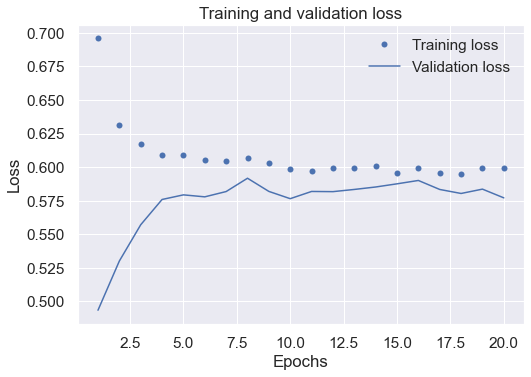

In [156]:
import matplotlib.pyplot as plt

accHis = history.history['accuracy']
val_accHis = history.history['val_accuracy']
lossHis = history.history['loss']
val_lossHis = history.history['val_loss']

epochs = range(1, len(accHis) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, lossHis, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_lossHis, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

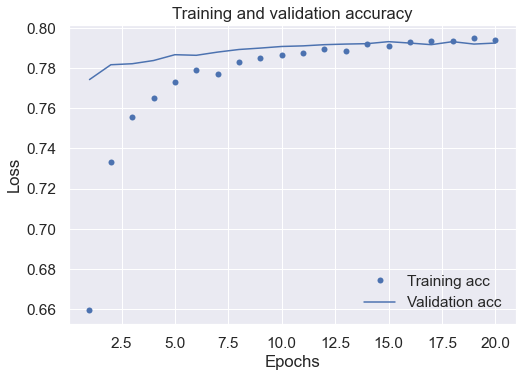

In [153]:
plt.clf()   # clear figure

plt.plot(epochs, accHis, 'bo', label='Training acc')
plt.plot(epochs, val_accHis, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Refit with optimal number of epochs**

In [230]:
history2m = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=8,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    class_weight=class_weight)

Epoch 1/8
22/22 [==============================] - 0s 8ms/step - loss: 0.6037 - accuracy: 0.7320 - recall: 0.6236 - val_loss: 0.5919 - val_accuracy: 0.7231 - val_recall: 0.6333
Epoch 2/8
22/22 [==============================] - 0s 7ms/step - loss: 0.6055 - accuracy: 0.7223 - recall: 0.6186 - val_loss: 0.5872 - val_accuracy: 0.7247 - val_recall: 0.6288
Epoch 3/8
22/22 [==============================] - 0s 11ms/step - loss: 0.6018 - accuracy: 0.7215 - recall: 0.6195 - val_loss: 0.5904 - val_accuracy: 0.7245 - val_recall: 0.6324
Epoch 4/8
22/22 [==============================] - 0s 6ms/step - loss: 0.6058 - accuracy: 0.7242 - recall: 0.6322 - val_loss: 0.5915 - val_accuracy: 0.7234 - val_recall: 0.6351
Epoch 5/8
22/22 [==============================] - 0s 7ms/step - loss: 0.5988 - accuracy: 0.7241 - recall: 0.6388 - val_loss: 0.5835 - val_accuracy: 0.7291 - val_recall: 0.6243
Epoch 6/8
22/22 [==============================] - 0s 6ms/step - loss: 0.5977 - accuracy: 0.7244 - recall: 0.6236 

**Evalulation Metrics**

In [231]:
score2m = model.evaluate(XNTest, yNTest)
score2m

282/282 [==============================] - 0s 1ms/step - loss: 0.5880 - accuracy: 0.7256 - recall: 0.6419


[0.5879889130592346, 0.7255555391311646, 0.6418884992599487]